<a href="https://colab.research.google.com/github/leoforner/Busca_elevador/blob/main/trabalho_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Codificação do problema


elevador = [17,26,20,19,31]

n_andares = 49
sobe = 8
desce = 13
erros = []
goal = [21,25]




def subir(valores,x,y):
    if (  n_andares - valores[x] <= sobe) or (n_andares - valores[y] <= sobe):
        #print(valores)
        print("não há como subir")
    else:
        #print("subindo")
        valores[x] += sobe;
        valores[y] += sobe;
        #print(valores)


def descer(valores,x,y):
    if ( valores[x] <= desce) or ( valores[y] <= desce):
        #print(valores)
        print("não há como descer")
    else:
        #print("descendo")
        valores[x] -= desce;
        valores[y] -= desce;
        #print(valores)


def check(valores):
    print(valores)
    for i in valores:
        if not(goal[0] <= i <= goal[1]):
            return False
    return True



In [10]:
    # @title Texto de título padrão

    import time
    import matplotlib.pyplot as plt
    import numpy as np

    inferior = 21
    superior = 25



    def calcular_erro(valor):
        limite_inferior = inferior
        limite_superior = superior
        if valor < limite_inferior:
            return valor - limite_inferior
        elif valor > limite_superior:
            return valor - limite_superior
        else:
            return 0



    def indices_maiores_valores(lista, n):
        # Use enumerate para obter os índices e valores da lista
        indices_valores = list(enumerate(lista))
        # Classifique a lista de índices e valores com base nos valores (em ordem decrescente)
        indices_valores.sort(key=lambda x: x[1], reverse=True)

        maiores_indices = []
        zeros_indices = []

        for indice, valor in indices_valores:
            if valor != 0:
                maiores_indices.append(indice)
            else:
                zeros_indices.append(indice)

            #if len(maiores_indices) == n:
            #    break

        # Se houver zeros nos maiores valores, substitua-os pelos próximos maiores índices
        if len(maiores_indices) < n:
            zeros_indices = zeros_indices[:n - len(maiores_indices)]
            maiores_indices.extend(zeros_indices)

        return maiores_indices





    def a_estrela(valores):

        print(valores)
        passos = 0
        erros = [calcular_erro(valor) for valor in valores]

        passo = [0]


        indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

        tempo = [0]

        andar = np.copy(valores)

        while dois_maiores_erros != [0,0]:

            tempo.append(time.time())


            if dois_maiores_erros > [0,0]:
                descer(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])
                print("sobe")
            else:
                print("desce")
                subir(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])

            erros = [calcular_erro(valor) for valor in valores]
            dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

            if dois_maiores_erros[0] == 0 :
                indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros

            erros = [calcular_erro(valor) for valor in valores]
            dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]




            passos += 1
            passo.append(passos)

            if np.array_equal(andar, valores):
                break

            andar = np.copy(valores)
            #print(passos)
            if passos > 5000:
                break


        tempo.append(time.time())
        print(tempo)

        tempo.pop(0)

        plt.plot(tempo, passo)

        plt.xlim(tempo[0], tempo[-1])

        plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

        # Adicionar rótulos e título
        plt.xlabel('Tempo de execução')
        plt.ylabel('Passos')
        plt.title('5 elevadores 21/25, posições {}'.format(copia))

        # Exibir o gráfico
        plt.show()



    # Exemplo de uso
    #lista_valores = [17,26,20,19,31]
    lista_valores = [35,46,41,9,13]
    #lista_valores = [17,26,20,19,31]
    #lista_valores = [17,26,20,19,31]
    #lista_valores = [17,26,20,19,31]

    copia = np.copy(lista_valores)

    valores_selecionados = a_estrela(lista_valores)





In [ ]:
# @title elevador random

import time
import matplotlib.pyplot as plt
import random
import numpy as np


inicio = time.time()


inferior = 21
superior = 25


def medir_erros(elevadores):
  for i in elevadores:
    erro = 0
    if i <= inferior:
      erro = i - inferior
    elif i >= superior:
      erro = i - superior
    erros.append(erro)
  erros.sort()
  return erros



def calcular_erro(valor):
    limite_inferior = inferior
    limite_superior = superior
    if valor < limite_inferior:
        return valor - limite_inferior
    elif valor > limite_superior:
        return valor - limite_superior
    else:
        return 0



def indices_maiores_valores(lista, n):
    # Use enumerate para obter os índices e valores da lista
    indices_valores = list(enumerate(lista))
    # Classifique a lista de índices e valores com base nos valores (em ordem decrescente)
    indices_valores.sort(key=lambda x: x[1], reverse=True)

    maiores_indices = []
    zeros_indices = []

    for indice, valor in indices_valores:
        if valor != 0:
            maiores_indices.append(indice)
        else:
            zeros_indices.append(indice)

        #if len(maiores_indices) == n:
        #    break

    # Se houver zeros nos maiores valores, substitua-os pelos próximos maiores índices
    if len(maiores_indices) < n:
        zeros_indices = zeros_indices[:n - len(maiores_indices)]
        maiores_indices.extend(zeros_indices)

    return maiores_indices





def a_estrela(valores):
    #print(valores)
    passos = 0
    erros = [calcular_erro(valor) for valor in valores]
    #print(erros)

    tempo = [time.time()]
    passo = [0]


    indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros
    #print(indices_dois_maiores_erros[1])
    dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

    while dois_maiores_erros != [0,0]:



        if dois_maiores_erros > [0,0]:
            descer(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])
        else:
            subir(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

        if dois_maiores_erros[0] == 0 :
            indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

        tempo.append(time.time())


        passos += 1
        passo.append(passos)
        #print(passos)
        #if passos > 20:
        #    return


        #print(valores)


    final = time.time()

    #print(final - inicio)

    # Criar o gráfico
    plt.plot(tempo, passo)


    plt.xlim(tempo[0], tempo[-1])

    plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


    # Adicionar rótulos e título
    plt.xlabel('Tempo de execução')
    plt.ylabel('Passos')
    plt.title('5 elevadores 21/25, posições {}'.format(copia))

    # Exibir o gráfico
    plt.show()


'''

        print(indices_dois_maiores_erros)
        print(dois_maiores_erros)
'''







# Exemplo de uso
lista_valores = [random.randint(0, 49) for _ in range(5)]
copia = np.copy(lista_valores)
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
print(copia)


valores_selecionados = a_estrela(lista_valores)
#print("Valores correspondentes aos dois maiores erros:", valores_selecionados)




[17, 26, 20, 19, 31, 4, 9]
[0, 1713236055.752512, 1713236055.7525258, 1713236055.7525375, 1713236055.7525456, 1713236055.752561, 1713236055.7525697, 1713236055.752578, 1713236055.7525918, 1713236055.7526062, 1713236055.7526147, 1713236055.7526295, 1713236055.752638, 1713236055.7526467, 1713236055.7526598, 1713236055.7526686, 1713236055.7526827, 1713236055.752691, 1713236055.752698, 1713236055.7527103, 1713236055.752718, 1713236055.7527301, 1713236055.7527423, 1713236055.7527506, 1713236055.7527614, 1713236055.7527695, 1713236055.7527776, 1713236055.75279, 1713236055.7527978, 1713236055.7528102, 1713236055.752817, 1713236055.7528243, 1713236055.7528372]


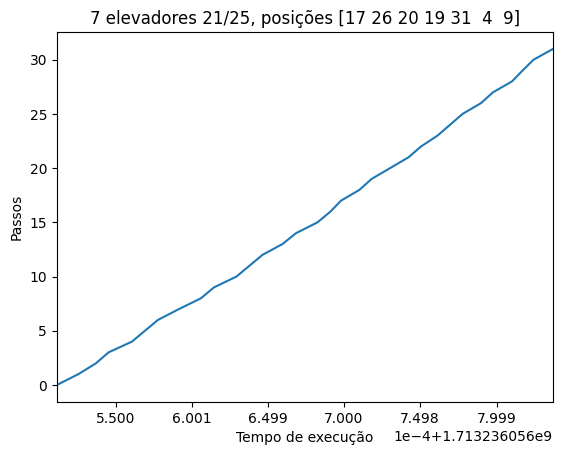

In [ ]:
# @title mais elevadores

import time
import matplotlib.pyplot as plt
import numpy as np
import random




inferior = 21
superior = 25


def medir_erros(elevadores):
  for i in elevadores:
    erro = 0
    if i <= inferior:
      erro = i - inferior
    elif i >= superior:
      erro = i - superior
    erros.append(erro)
  erros.sort()
  return erros



def calcular_erro(valor):
    limite_inferior = inferior
    limite_superior = superior
    if valor < limite_inferior:
        return valor - limite_inferior
    elif valor > limite_superior:
        return valor - limite_superior
    else:
        return 0



def indices_maiores_valores(lista, n):
    # Use enumerate para obter os índices e valores da lista
    indices_valores = list(enumerate(lista))
    # Classifique a lista de índices e valores com base nos valores (em ordem decrescente)
    indices_valores.sort(key=lambda x: x[1], reverse=True)

    maiores_indices = []
    zeros_indices = []

    for indice, valor in indices_valores:
        if valor != 0:
            maiores_indices.append(indice)
        else:
            zeros_indices.append(indice)

        #if len(maiores_indices) == n:
        #    break

    # Se houver zeros nos maiores valores, substitua-os pelos próximos maiores índices
    if len(maiores_indices) < n:
        zeros_indices = zeros_indices[:n - len(maiores_indices)]
        maiores_indices.extend(zeros_indices)

    return maiores_indices





def a_estrela(valores):

    print(valores)
    passos = 0
    erros = [calcular_erro(valor) for valor in valores]
    #print(erros)



    passo = [0]


    indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros
    #print(indices_dois_maiores_erros[1])
    dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

    tempo = [0]


    while dois_maiores_erros != [0,0]:

        tempo.append(time.time())


        if dois_maiores_erros > [0,0]:
            descer(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])
        else:
            subir(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

        if dois_maiores_erros[0] == 0 :
            indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]




        passos += 1
        passo.append(passos)
        #print(passos)
        #if passos > 20:
        #    return


    tempo.append(time.time())
    print(tempo)



    tempo.pop(0)

    #print(final - inicio)

    # Criar o gráfico
    plt.plot(tempo, passo)

    plt.xlim(tempo[0], tempo[-1])

    plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

    # Adicionar rótulos e título
    plt.xlabel('Tempo de execução')
    plt.ylabel('Passos')
    plt.title('7 elevadores 21/25, posições {}'.format(copia))

    # Exibir o gráfico
    plt.show()


'''

        print(indices_dois_maiores_erros)
        print(dois_maiores_erros)
'''







# Exemplo de uso
lista_valores = [17,26,20,19,31,random.randint(0, 49), random.randint(0, 49)]
copia = np.copy(lista_valores)
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]


valores_selecionados = a_estrela(lista_valores)
#print("Valores correspondentes aos dois maiores erros:", valores_selecionados)




[17, 26, 20, 19, 31]
[0, 1713237967.5024104, 1713237967.5024257, 1713237967.5024354, 1713237967.502442, 1713237967.5024476, 1713237967.502454, 1713237967.5024598, 1713237967.5024657, 1713237967.5024726, 1713237967.5024786, 1713237967.5024855, 1713237967.5025003, 1713237967.5025144, 1713237967.502521, 1713237967.502528, 1713237967.5025403, 1713237967.5025487, 1713237967.5025558, 1713237967.5025625, 1713237967.5025678, 1713237967.502582, 1713237967.5025957]


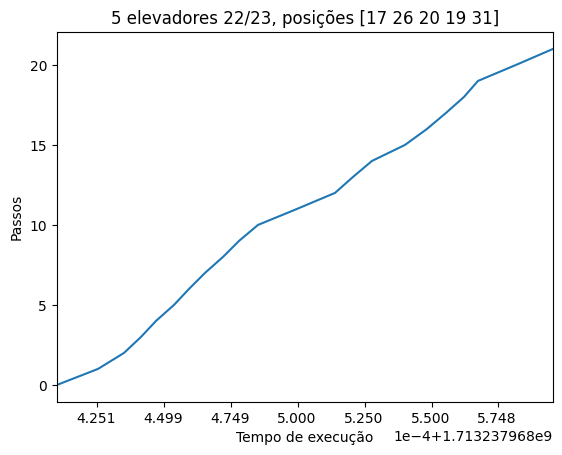

In [ ]:
# @title intervalo diferente

import time
import matplotlib.pyplot as plt
import numpy as np
import random




inferior = 22
superior = 23


def medir_erros(elevadores):
  for i in elevadores:
    erro = 0
    if i <= inferior:
      erro = i - inferior
    elif i >= superior:
      erro = i - superior
    erros.append(erro)
  erros.sort()
  return erros



def calcular_erro(valor):
    limite_inferior = inferior
    limite_superior = superior
    if valor < limite_inferior:
        return valor - limite_inferior
    elif valor > limite_superior:
        return valor - limite_superior
    else:
        return 0



def indices_maiores_valores(lista, n):
    # Use enumerate para obter os índices e valores da lista
    indices_valores = list(enumerate(lista))
    # Classifique a lista de índices e valores com base nos valores (em ordem decrescente)
    indices_valores.sort(key=lambda x: x[1], reverse=True)

    maiores_indices = []
    zeros_indices = []

    for indice, valor in indices_valores:
        if valor != 0:
            maiores_indices.append(indice)
        else:
            zeros_indices.append(indice)

        #if len(maiores_indices) == n:
        #    break

    # Se houver zeros nos maiores valores, substitua-os pelos próximos maiores índices
    if len(maiores_indices) < n:
        zeros_indices = zeros_indices[:n - len(maiores_indices)]
        maiores_indices.extend(zeros_indices)

    return maiores_indices





def a_estrela(valores):

    print(valores)
    passos = 0
    erros = [calcular_erro(valor) for valor in valores]
    #print(erros)



    passo = [0]


    indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros
    #print(indices_dois_maiores_erros[1])
    dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

    tempo = [0]


    while dois_maiores_erros != [0,0]:

        tempo.append(time.time())


        if dois_maiores_erros > [0,0]:
            descer(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])
        else:
            subir(valores,indices_dois_maiores_erros[0],indices_dois_maiores_erros[1])

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]

        if dois_maiores_erros[0] == 0 :
            indices_dois_maiores_erros = indices_maiores_valores(erros,2)  # Seleciona os dois maiores erros

        erros = [calcular_erro(valor) for valor in valores]
        dois_maiores_erros = [erros[indices_dois_maiores_erros[0]], erros[indices_dois_maiores_erros[1]]]




        passos += 1
        passo.append(passos)
        #print(passos)
        #if passos > 20:
        #    return


    tempo.append(time.time())
    print(tempo)



    tempo.pop(0)

    #print(final - inicio)

    # Criar o gráfico
    plt.plot(tempo, passo)

    plt.xlim(tempo[0], tempo[-1])

    plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

    # Adicionar rótulos e título
    plt.xlabel('Tempo de execução')
    plt.ylabel('Passos')
    plt.title('5 elevadores 22/23, posições {}'.format(copia))

    # Exibir o gráfico
    plt.show()


'''

        print(indices_dois_maiores_erros)
        print(dois_maiores_erros)
'''







# Exemplo de uso
lista_valores = [17,26,20,19,31]
copia = np.copy(lista_valores)
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]
#lista_valores = [17,26,20,19,31]


valores_selecionados = a_estrela(lista_valores)
#print("Valores correspondentes aos dois maiores erros:", valores_selecionados)


